In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df3 = df.iloc[:,:-1]

In [6]:
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [7]:
df3.shape

(20640, 9)

In [8]:
df.shape

(20640, 10)

In [9]:
df3.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [10]:
df3.population.median()

1166.0

### Exploratory data analysis

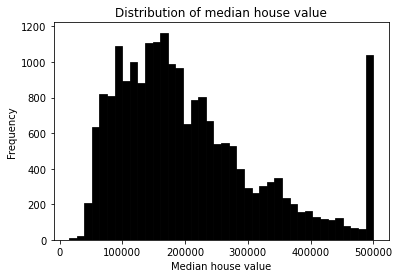

In [11]:
plt.figure(figsize=(6,4))

sns.histplot(df3.median_house_value, bins = 40, color = 'black', alpha = 1)
plt.ylabel('Frequency')
plt.xlabel('Median house value')
plt.title('Distribution of median house value')

plt.show()

### Split the data

In [12]:
np.random.seed(42)

In [13]:
n =df3.shape[0]
n

20640

In [14]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [15]:
idx = np.arange(n)

In [16]:
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [17]:
np.random.shuffle(idx)

In [18]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [19]:
df3_shuffled = df3.iloc[idx]

In [20]:
df3_train = df3_shuffled.iloc[:n_train].copy()
df3_val = df3_shuffled.iloc[n_train:n_train+n_val].copy()
df3_test = df3_shuffled.iloc[n_train+n_val:].copy()

#### Get the values of the target variable into temporary variable

In [21]:
y_train_orig = df3_train.median_house_value.values

y_val_orig = df3_val.median_house_value.values

y_test_orig = df3_test.median_house_value.values


#### Apply log transformation to the target variable

In [22]:
y_train = np.log1p(y_train_orig)

y_val = np.log1p(y_val_orig)

y_test = np.log1p(y_test_orig)

#### Delete the target variable from the dataframe

In [23]:
del df3_train['median_house_value']
del df3_val['median_house_value']
del df3_test['median_house_value']

#### Linear Regression

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#### Deal with the null values
* Fill with 0

In [25]:
X_train_fill_zero = df3_train.fillna(0)


In [26]:
w_0, w = train_linear_regression(X_train_fill_zero, y_train)

In [27]:
y_pred_fill_zero = w_0 + X_train_fill_zero.dot(w)

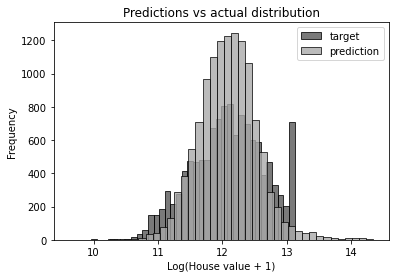

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_fill_zero, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(House value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [29]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [30]:
rmse(y_train, y_pred_fill_zero).round(2)

0.34

In [31]:
X_val_fill_zero = df3_val.fillna(0)

In [32]:
y_pred_fill_zero = w_0 + X_val_fill_zero.dot(w)

In [33]:
rmse(y_val, y_pred_fill_zero).round(2)

0.33

* Fill with mean

In [34]:
df3.total_bedrooms.mean()

537.8705525375618

In [35]:
X_train_fill_mean = df3_train.fillna(537.87)

In [36]:
w_0, w = train_linear_regression(X_train_fill_mean, y_train)

In [37]:
y_pred_fill_mean = w_0 + X_train_fill_mean.dot(w)

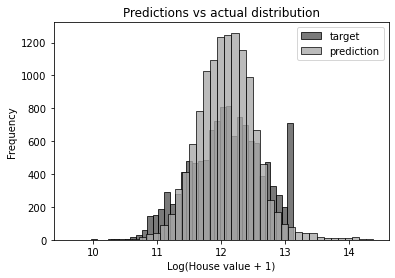

In [38]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_fill_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(House value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [39]:
rmse(y_train, y_pred_fill_mean).round(2)

0.34

#### Observation
* The null values filled with zero has a RMSE of 0.34 on both the training and validation set.

* The null values filled with the mean of the null variable has a RMSE of 0.33 on the training set.

#### Train regularized linear regression

In [40]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [41]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_fill_zero, y_train, r=r)
    y_pred = w_0 + X_val_fill_zero.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.32953303652286786
 1e-06 0.3295330361646609
0.0001 0.32953300097024524
 0.001 0.32953270386770583
  0.01 0.3295319365992315
   0.1 0.32969472053964766
     1 0.33378872200062304
     5 0.3392485345504286
    10 0.34060638078088795


#### Train with different seeds

In [42]:

rmse_list = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df3_shuffled = df3.iloc[idx]
    
    df3_train = df3_shuffled.iloc[:n_train].copy()
    df3_val = df3_shuffled.iloc[n_train:n_train+n_val].copy()
    df3_test = df3_shuffled.iloc[n_train+n_val:].copy()

    df3_train = df3_train.reset_index(drop=True)
    df3_val = df3_val.reset_index(drop=True)
    df3_test = df3_test.reset_index(drop=True)
    
    y_train_orig = df3_train.median_house_value.values
    y_val_orig = df3_val.median_house_value.values
    y_test_orig = df3_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df3_train['median_house_value']
    del df3_val['median_house_value']
    del df3_test['median_house_value']
    
    w_0, w = train_linear_regression(X_train_fill_zero, y_train)
    y_pred = w_0 + X_val_fill_zero.dot(w)
    rmse_val = np.round(rmse(y_val, y_pred),2)
    
    rmse_list.append(rmse_val)
    
    print(s, w_0, rmse_val)

0 11.282395934306688 0.57
1 12.389351421427612 0.57
2 11.826192837203726 0.57
3 12.93218194755253 0.57
4 12.420650751897039 0.57
5 12.1332631810408 0.57
6 12.220432275322121 0.57
7 12.061117837447647 0.57
8 11.542417975459013 0.57
9 12.649679622320086 0.57


In [43]:
np.std(rmse_list)

1.1102230246251565e-16

In [44]:
np.round(np.std(rmse_list),3)

0.0

#### Split the dataset using seed 9

In [45]:

n = len(df)

n_val_9 = int(0.2 * n)
n_test_9 = int(0.2 * n)
n_train_9 = n - (n_val_9 + n_test_9)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df3.iloc[idx]

df_train_9 = df_shuffled.iloc[:n_train_9].copy()
df_val_9 = df_shuffled.iloc[n_train_9:n_train_9 + n_val_9].copy()
df_test_9 = df_shuffled.iloc[n_train_9 + n_val_9:].copy()

In [46]:
y_train_9 = np.log1p(df_train_9.median_house_value.values)
y_val_9 = np.log1p(df_val_9.median_house_value.values)
y_test_9 = np.log1p(df_test_9.median_house_value.values)

del df_train_9['median_house_value']
del df_val_9['median_house_value']
del df_test_9['median_house_value']

In [47]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [48]:
df_full_train = pd.concat([df_train_9, df_val_9])

df_full_train = df_full_train.reset_index(drop=True)

In [49]:
df_full_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
dtype: int64

In [50]:
df_full_train = df_full_train.fillna(0)

In [51]:
df_full_train.values

array([[-121.8   ,   38.67  ,   10.    , ..., 1073.    ,  378.    ,
           4.5526],
       [-117.97  ,   33.66  ,   22.    , ..., 1871.    ,  607.    ,
           5.8541],
       [-124.25  ,   40.28  ,   32.    , ...,  434.    ,  187.    ,
           1.9417],
       ...,
       [-118.13  ,   33.93  ,   34.    , ..., 1578.    ,  488.    ,
           3.1496],
       [-118.37  ,   34.11  ,   42.    , ..., 1863.    ,  957.    ,
           8.5842],
       [-118.37  ,   34.08  ,   52.    , ...,  543.    ,  213.    ,
           6.0338]])

In [52]:
y_full_train = np.concatenate([y_train_9, y_val_9])

In [53]:
w_0, w = train_linear_regression_reg(df_full_train, y_full_train,r=0.001)

In [54]:
X_test_9 = df_test_9.fillna(0)

In [55]:
y_pred_9 = w_0 + X_test_9.dot(w)
score = rmse(y_test_9,y_pred_9)

In [56]:
score

0.34531689143639693